<a href="https://colab.research.google.com/github/uendercarlos/webscraping-IBGE--geopandas/blob/main/webscraping_IBGE_geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔥 SCRAP IBGE: estados brasileiros

## 📗 Importando Bibliotecas

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

import plotly as plt
import plotly.express as px
import json
from urllib.request import urlopen


## 🕵️ Request + Selector

In [ ]:
# Função para realizar o WebScraping
def scrap_state_info(state: str) -> dict:
    """
    Retorna informações do estado brasileiro

    :param state: nome do estado
    :returns state_dict: dicionário com indicadores do estado
    """
    print(f'⛷️ Picking {state} info...')
    state_url = f'https://www.ibge.gov.br/cidades-e-estados/{state}.html'
    page = requests.get(state_url)

    soup = BeautifulSoup(page.content, 'html.parser')
    indicadors = soup.select('.indicador')

    state_dict = {
        ind.select('.ind-label')[0].text: ind.select('.ind-value')[0].text
        for ind in indicadors
    }

    state_dict['Estado'] = state

    return state_dict

scrap_state_info('sp')



⛷️ Picking sp info...


{'Capital': 'São Paulo\xa0\xa0\xa0[2010]',
 'Densidade demográfica': '166,25 hab/km²\xa0\xa0\xa0[2010]',
 'Despesas empenhadas': '231.982.243,69176 R$ (×1000)\xa0\xa0\xa0[2017]',
 'Estado': 'sp',
 'Gentílico': 'paulista',
 'Governador': 'JOÃO AGRIPINO DA COSTA DORIA JUNIOR\xa0\xa0\xa0[2019]',
 'IDH Índice de desenvolvimento humano': '0,783\xa0\xa0\xa0[2010]',
 'Matrículas no ensino fundamental': '5.367.614 matrículas\xa0\xa0\xa0[2018]',
 'População estimada': '46.289.333 pessoas\xa0\xa0\xa0[2020]',
 'Receitas realizadas': '232.822.496,56706 R$ (×1000)\xa0\xa0\xa0[2017]',
 'Rendimento mensal domiciliar per capita': '1.814 R$\xa0\xa0\xa0[2020]',
 'Total de veículos': '29.057.749 veículos\xa0\xa0\xa0[2018]',
 'Área Territorial': '248.219,481 km²\xa0\xa0\xa0[2020]'}

In [ ]:
states = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']

states_data = [scrap_state_info(state) for state in states]

⛷️ Picking AC info...
⛷️ Picking AL info...
⛷️ Picking AP info...
⛷️ Picking AM info...
⛷️ Picking BA info...
⛷️ Picking CE info...
⛷️ Picking DF info...
⛷️ Picking ES info...
⛷️ Picking GO info...
⛷️ Picking MA info...
⛷️ Picking MT info...
⛷️ Picking MS info...
⛷️ Picking MG info...
⛷️ Picking PA info...
⛷️ Picking PB info...
⛷️ Picking PR info...
⛷️ Picking PE info...
⛷️ Picking PI info...
⛷️ Picking RJ info...
⛷️ Picking RN info...
⛷️ Picking RS info...
⛷️ Picking RO info...
⛷️ Picking RR info...
⛷️ Picking SC info...
⛷️ Picking SP info...
⛷️ Picking SE info...
⛷️ Picking TO info...


In [ ]:
df = pd.DataFrame(states_data)
df.head()
# df.info()

,Governador,Capital,Gentílico,Área Territorial,População estimada,Densidade demográfica,Matrículas no ensino fundamental,IDH Índice de desenvolvimento humano,Receitas realizadas,Despesas empenhadas,Rendimento mensal domiciliar per capita,Total de veículos,Estado
0,GLADSON DE LIMA CAMELI [2019],Rio Branco [2010],acriano,"164.173,431 km² [2020]",894.470 pessoas [2020],"4,47 hab/km² [2010]",157.646 matrículas [2018],"0,663 [2010]","6.632.883,10836 R$ (×1000) [2017]","6.084.416,8063 R$ (×1000) [2017]",917 R$ [2020],277.831 veículos [2018],AC
1,JOSE RENAN VASCONCELOS CALHEIROS FILHO [2019],Maceió [2010],alagoano,"27.830,656 km² [2020]",3.351.543 pessoas [2020],"112,33 hab/km² [2010]",490.587 matrículas [2018],"0,631 [2010]","11.950.438,46015 R$ (×1000) [2017]","10.460.634,91711 R$ (×1000) [2017]",796 R$ [2020],834.827 veículos [2018],AL
2,ANTONIO WALDEZ GÓES DA SILVA [2019],Macapá [2010],amapaense,"142.470,762 km² [2020]",861.773 pessoas [2020],"4,69 hab/km² [2010]",136.185 matrículas [2018],"0,708 [2010]","5.396.417,14471 R$ (×1000) [2017]","4.224.464,08829 R$ (×1000) [2017]",893 R$ [2020],195.039 veículos [2018],AP
3,WILSON MIRANDA LIMA [2019],Manaus [2010],amazonense,"1.559.167,878 km² [2020]",4.207.714 pessoas [2020],"2,23 hab/km² [2010]",705.007 matrículas [2018],"0,674 [2010]","17.328.459,43402 R$ (×1000) [2017]","15.324.896,55705 R$ (×1000) [2017]",852 R$ [2020],883.083 veículos [2018],AM
4,RUI COSTA DOS SANTOS [2019],Salvador [2010],baiano,"564.760,427 km² [2020]",14.930.634 pessoas [2020],"24,82 hab/km² [2010]",2.034.711 matrículas [2018],"0,660 [2010]","50.191.003,24052 R$ (×1000) [2017]","45.570.160,0038 R$ (×1000) [2017]",965 R$ [2020],4.139.107 veículos [2018],BA


## 🧻 Cleaning

In [ ]:
states_df = df.copy()
states_df.columns = ['governor', 'capital', 'gentile', 'area', 'population', 'demographic_density', 'primary_school_enrollment', 'idh', 'realized_revenue', 'committed_expenses', 'income_per_capita', 'vehicle_total', 'code']
states_df = states_df[['code', 'governor', 'population', 'area', 'idh', 'income_per_capita', 'vehicle_total', 'primary_school_enrollment', 'committed_expenses', 'realized_revenue']]


states_df = states_df.replace({
    '\.': '',
    ',': '.',
    '\[\d+\]': '',
    ' hab/km²': '',
    ' km²': '',
    ' pessoas': '',
    ' matrículas': '',
    'R\$.*': '',
    ' veículos': ''
}, regex=True)

states_df.head()

num_cols = ['population', 'area', 'idh', 'income_per_capita', 'vehicle_total', 'primary_school_enrollment', 'committed_expenses', 'realized_revenue']

states_df[num_cols] = states_df[num_cols].apply(lambda x: x.str.strip())
states_df[num_cols] = states_df[num_cols].apply(pd.to_numeric)
states_df.info()

In [ ]:
df = pd.DataFrame(states_data)
states_df.head(27)
# df.info()

,code,governor,population,area,idh,income_per_capita,vehicle_total,primary_school_enrollment,committed_expenses,realized_revenue
0,AC,GLADSON DE LIMA CAMELI,894470,164173.431,0.663,917,277831,157646,6.084417e+06,6.632883e+06
1,AL,JOSE RENAN VASCONCELOS CALHEIROS FILHO,3351543,27830.656,0.631,796,834827,490587,1.046063e+07,1.195044e+07
2,AP,ANTONIO WALDEZ GÓES DA SILVA,861773,142470.762,0.708,893,195039,136185,4.224464e+06,5.396417e+06
3,AM,WILSON MIRANDA LIMA,4207714,1559167.878,0.674,852,883083,705007,1.532490e+07,1.732846e+07
4,BA,RUI COSTA DOS SANTOS,14930634,564760.427,0.660,965,4139107,2034711,4.557016e+07,5.019100e+07
5,CE,CAMILO SOBREIRA DE SANTANA,9187103,148894.442,0.682,1028,3148369,1198116,2.460835e+07,2.842022e+07
6,DF,IBANEIS ROCHA BARROS JUNIOR,3055149,5760.784,0.824,2475,1812473,377622,2.199046e+07,2.381221e+07
7,ES,JOSE RENATO CASAGRANDE,4064052,46074.447,0.740,1347,1936862,502059,1.439234e+07,1.968562e+07
8,GO,RONALDO RAMOS CAIADO,7113540,340242.854,0.735,1258,3909429,877593,2.424838e+07,3.788534e+07
9,MA,FLÁVIO DINO DE CASTRO E COSTA,7114598,329651.495,0.639,676,1696683,1178949,1.762717e+07,1.850326e+07


In [ ]:
states_df['idh'].describe()

count    27.000000
mean      0.704519
std       0.049284
min       0.631000
25%       0.664000
50%       0.699000
75%       0.737500
max       0.824000
Name: idh, dtype: float64

In [ ]:
states_df.describe()

,population,area,idh,income_per_capita,vehicle_total,primary_school_enrollment,committed_expenses,realized_revenue
count,2.700000e+01,2.700000e+01,27.000000,27.000000,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01
mean,7.842803e+06,3.151980e+05,0.704519,1210.888889,3.731354e+06,1.006814e+06,3.237044e+07,3.571354e+07
std,9.316952e+06,3.751190e+05,0.049284,409.600212,5.729603e+06,1.079327e+06,4.592375e+07,4.590409e+07
min,6.311810e+05,5.760784e+03,0.631000,676.000000,1.950390e+05,9.658200e+04,3.384684e+06,4.419450e+06
25%,2.932272e+06,7.609896e+04,0.664000,895.000000,9.340650e+05,3.908680e+05,9.875718e+06,1.203733e+07
50%,4.064052e+06,2.236445e+05,0.699000,1060.000000,1.812473e+06,5.562480e+05,1.762717e+07,1.968562e+07
75%,9.401862e+06,3.349472e+05,0.737500,1444.500000,4.024268e+06,1.300333e+06,2.945779e+07,3.681568e+07
max,4.628933e+07,1.559168e+06,0.824000,2475.000000,2.905775e+07,5.367614e+06,2.319822e+08,2.328225e+08


In [ ]:
#inserir colun
lat = ['-8.77','-9.71','-3.07','1.41','-12.96','-3.71','-15.83','-19.19','-16.64','-2.55','-12.64','-20.51','-18.10','-5.53','-7.06','-24.89','-8.28','-8.28','-22.84','-5.22','-11.22','-30.01','1.89','-27.33','-10.90','-23.55','-10.25']
states_df['lat'] = lat
print(states_df)

   code                                   governor  ...  realized_revenue     lat
0    AC                  GLADSON DE LIMA CAMELI     ...      6.632883e+06   -8.77
1    AL  JOSE RENAN VASCONCELOS CALHEIROS FILHO     ...      1.195044e+07   -9.71
2    AP            ANTONIO WALDEZ GÓES DA SILVA     ...      5.396417e+06   -3.07
3    AM                     WILSON MIRANDA LIMA     ...      1.732846e+07    1.41
4    BA                    RUI COSTA DOS SANTOS     ...      5.019100e+07  -12.96
5    CE              CAMILO SOBREIRA DE SANTANA     ...      2.842022e+07   -3.71
6    DF             IBANEIS ROCHA BARROS JUNIOR     ...      2.381221e+07  -15.83
7    ES                  JOSE RENATO CASAGRANDE     ...      1.968562e+07  -19.19
8    GO                    RONALDO RAMOS CAIADO     ...      3.788534e+07  -16.64
9    MA           FLÁVIO DINO DE CASTRO E COSTA     ...      1.850326e+07   -2.55
10   MT                   MAURO MENDES FERREIRA     ...      2.395853e+07  -12.64
11   MS         

In [ ]:
lon = ['-70.55','-35.73','-61.66','-51.77','-38.51','-38.54','-47.86','-40.34','-49.31','-44.30','-55.42','-54.54','-44.38','-52.29','-35.55','-51.55','-35.07','-43.68','-43.15','-36.52','-62.80','-51.22','-61.22','-49.44','-37.07','-46.64','-48.25']
states_df['lon'] = lon
print(states_df)

   code                                   governor  ...     lat     lon
0    AC                  GLADSON DE LIMA CAMELI     ...   -8.77  -70.55
1    AL  JOSE RENAN VASCONCELOS CALHEIROS FILHO     ...   -9.71  -35.73
2    AP            ANTONIO WALDEZ GÓES DA SILVA     ...   -3.07  -61.66
3    AM                     WILSON MIRANDA LIMA     ...    1.41  -51.77
4    BA                    RUI COSTA DOS SANTOS     ...  -12.96  -38.51
5    CE              CAMILO SOBREIRA DE SANTANA     ...   -3.71  -38.54
6    DF             IBANEIS ROCHA BARROS JUNIOR     ...  -15.83  -47.86
7    ES                  JOSE RENATO CASAGRANDE     ...  -19.19  -40.34
8    GO                    RONALDO RAMOS CAIADO     ...  -16.64  -49.31
9    MA           FLÁVIO DINO DE CASTRO E COSTA     ...   -2.55  -44.30
10   MT                   MAURO MENDES FERREIRA     ...  -12.64  -55.42
11   MS                 REINALDO AZAMBUJA SILVA     ...  -20.51  -54.54
12   MG                         ROMEU ZEMA NETO     ...  -18.10 

In [ ]:
states_df.head()

,code,governor,population,area,idh,income_per_capita,vehicle_total,primary_school_enrollment,committed_expenses,realized_revenue,lat,lon
0,AC,GLADSON DE LIMA CAMELI,894470,164173.431,0.663,917,277831,157646,6.084417e+06,6.632883e+06,-8.77,-70.55
1,AL,JOSE RENAN VASCONCELOS CALHEIROS FILHO,3351543,27830.656,0.631,796,834827,490587,1.046063e+07,1.195044e+07,-9.71,-35.73
2,AP,ANTONIO WALDEZ GÓES DA SILVA,861773,142470.762,0.708,893,195039,136185,4.224464e+06,5.396417e+06,-3.07,-61.66
3,AM,WILSON MIRANDA LIMA,4207714,1559167.878,0.674,852,883083,705007,1.532490e+07,1.732846e+07,1.41,-51.77
4,BA,RUI COSTA DOS SANTOS,14930634,564760.427,0.660,965,4139107,2034711,4.557016e+07,5.019100e+07,-12.96,-38.51


In [ ]:
states_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   code                       27 non-null     object 
 1   governor                   27 non-null     object 
 2   population                 27 non-null     int64  
 3   area                       27 non-null     float64
 4   idh                        27 non-null     float64
 5   income_per_capita          27 non-null     int64  
 6   vehicle_total              27 non-null     int64  
 7   primary_school_enrollment  27 non-null     int64  
 8   committed_expenses         27 non-null     float64
 9   realized_revenue           27 non-null     float64
 10  lat                        27 non-null     object 
 11  lon                        27 non-null     object 
dtypes: float64(4), int64(4), object(4)
memory usage: 2.7+ KB


In [ ]:
states_df["lat"] = states_df["lat"].astype(float)
states_df["lon"] = states_df["lon"].astype(float)
states_df.dtypes


code                          object
governor                      object
population                     int64
area                         float64
idh                          float64
income_per_capita              int64
vehicle_total                  int64
primary_school_enrollment      int64
committed_expenses           float64
realized_revenue             float64
lat                          float64
lon                          float64
dtype: object

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distribu

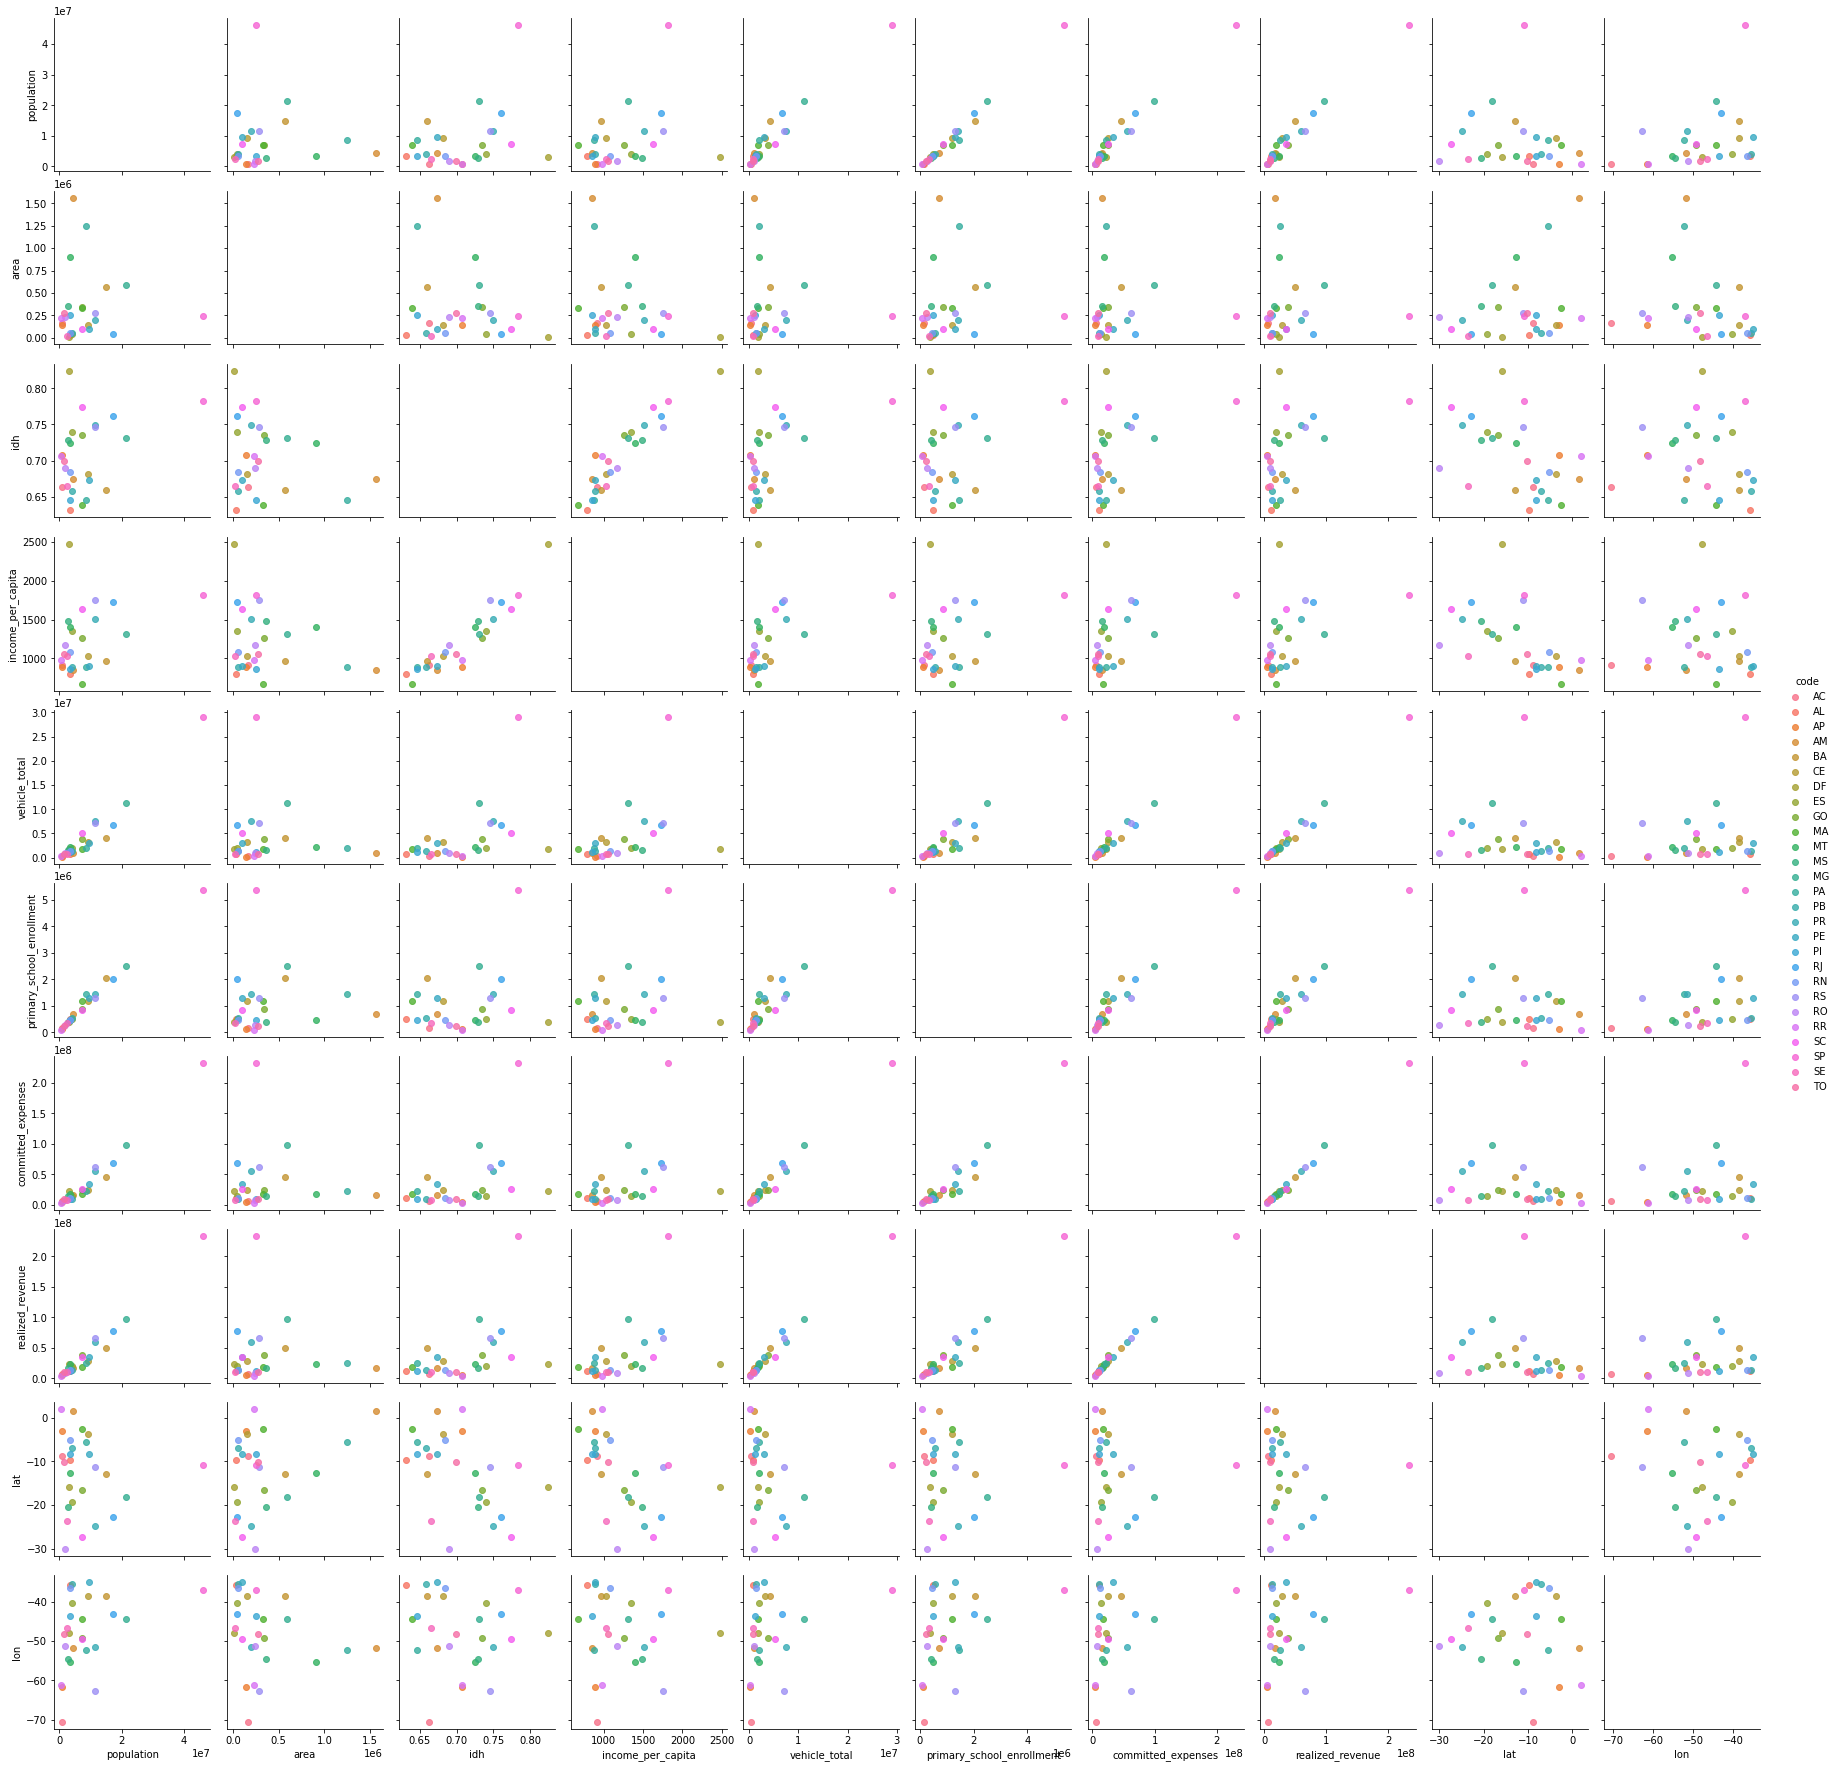

In [ ]:
# Criação do Gráfico de dispersão (scatter) conhecido como pairplot
sns.pairplot(states_df, hue='code', kind="reg") # kind=reg é a reta de regressão

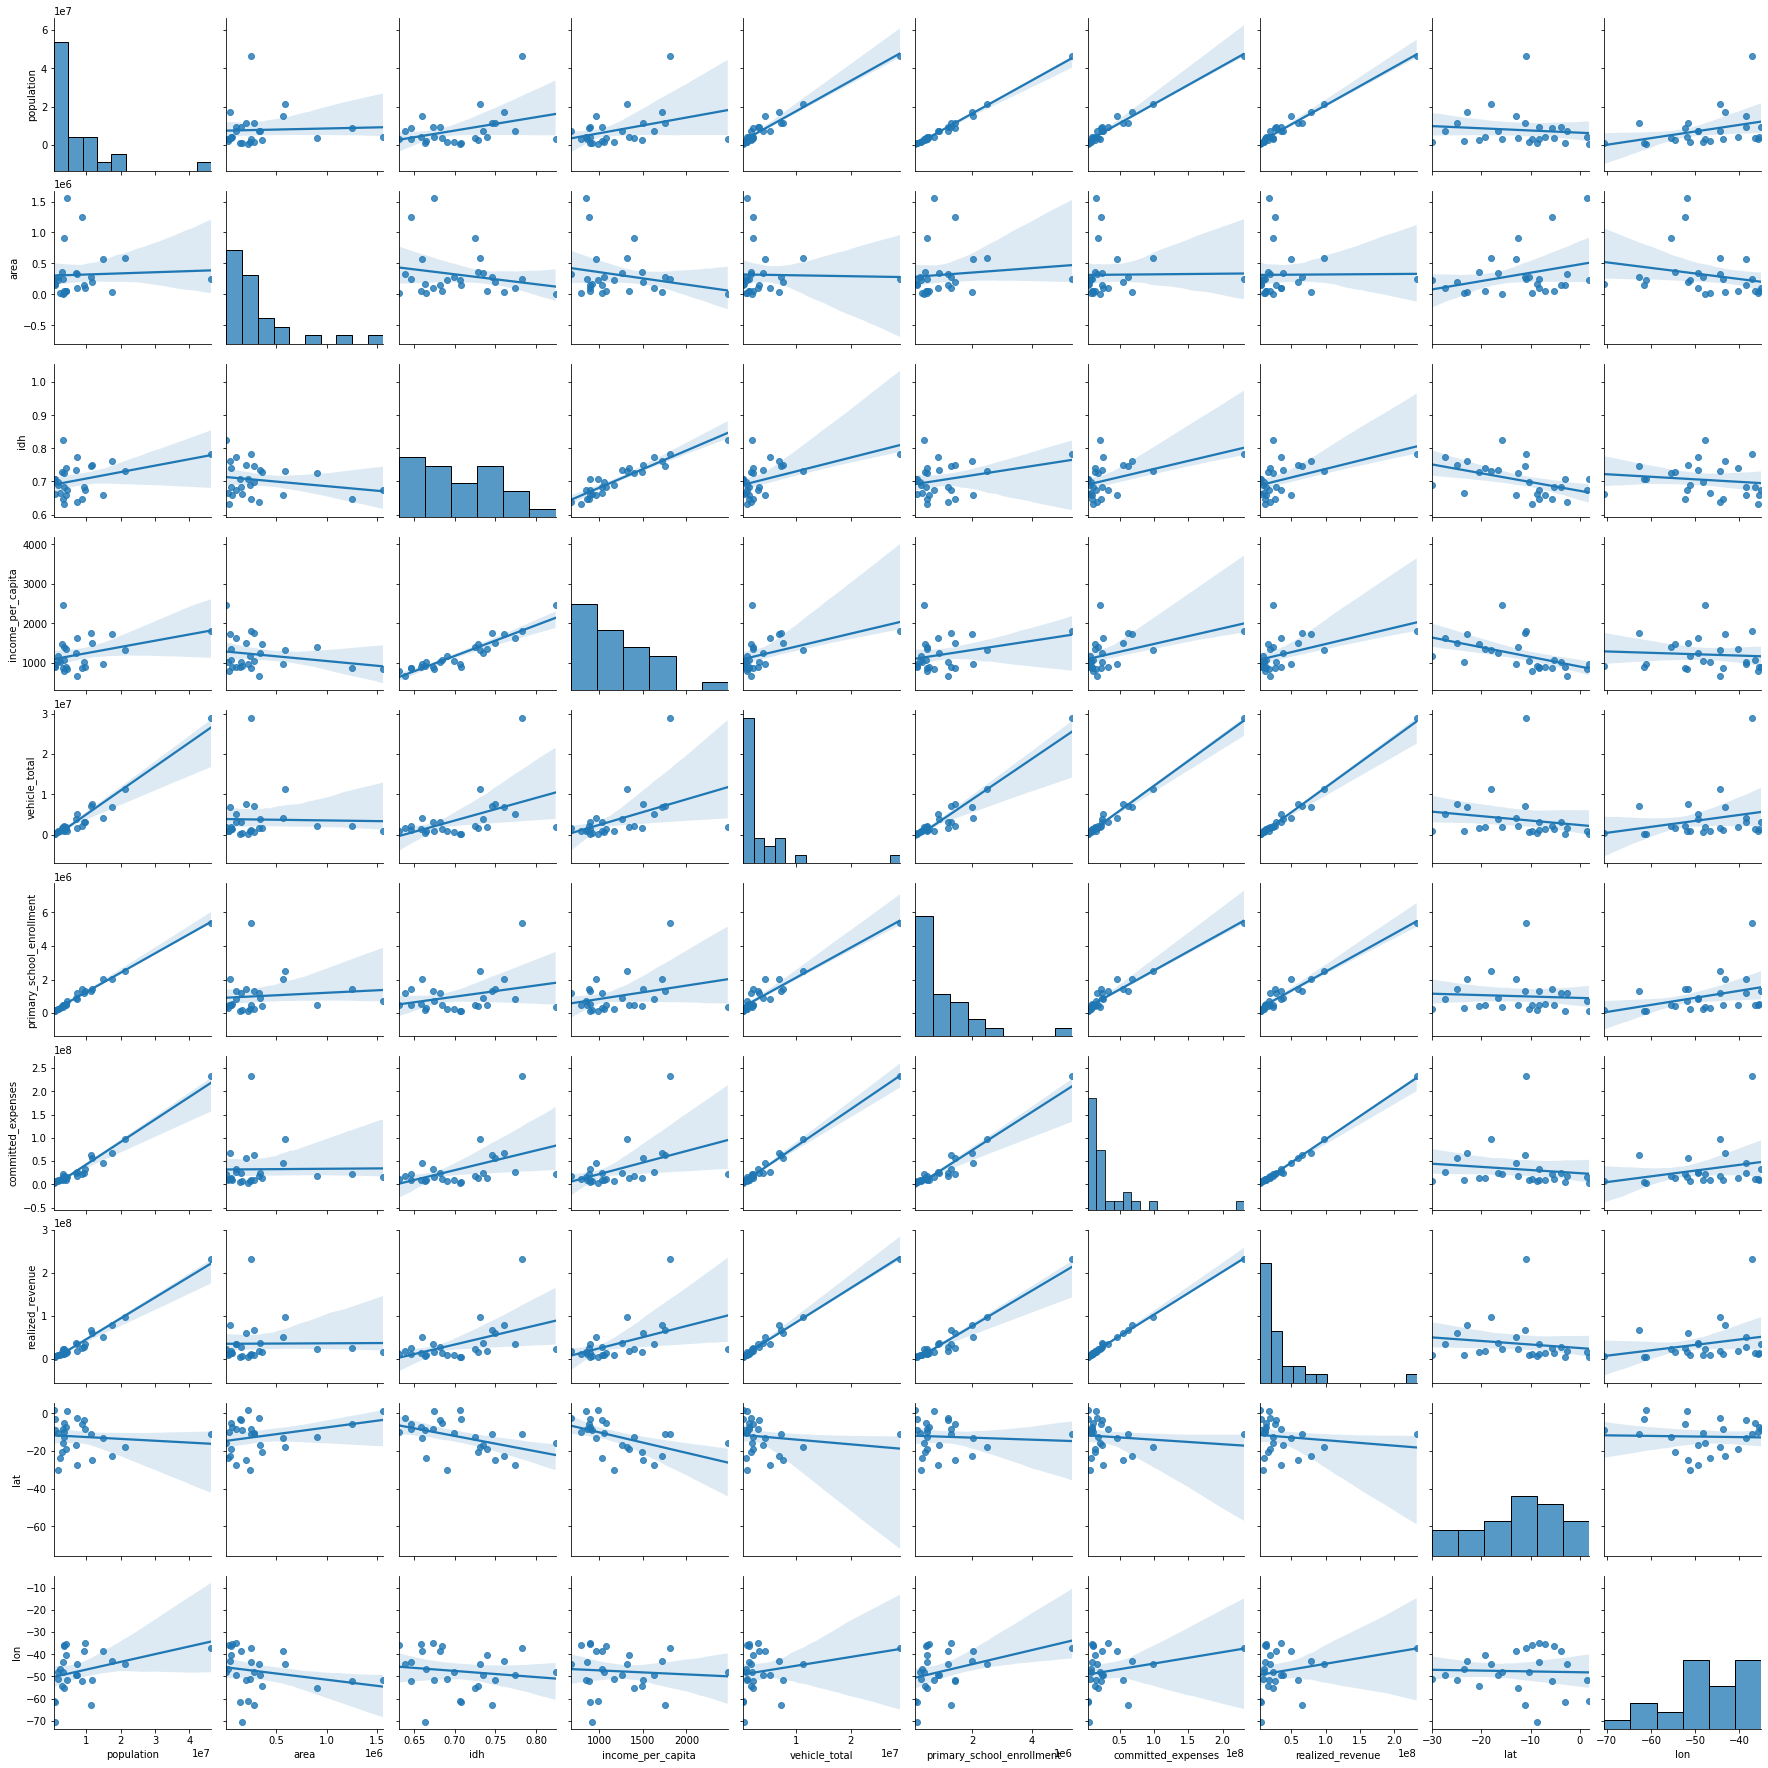

In [ ]:
# Criação do Gráfico de dispersão sem agregar pelo TARGET
sns.pairplot(states_df,kind="reg")

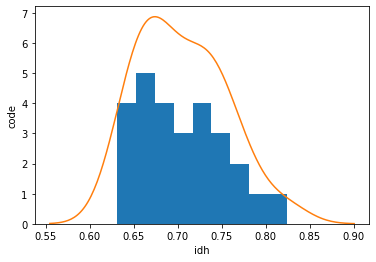

In [ ]:
import matplotlib.pyplot as plt
plt.hist(states_df['idh'],bins=9)
plt.xlabel('idh')
plt.ylabel('code')

sns.kdeplot(states_df['idh'].dropna())


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


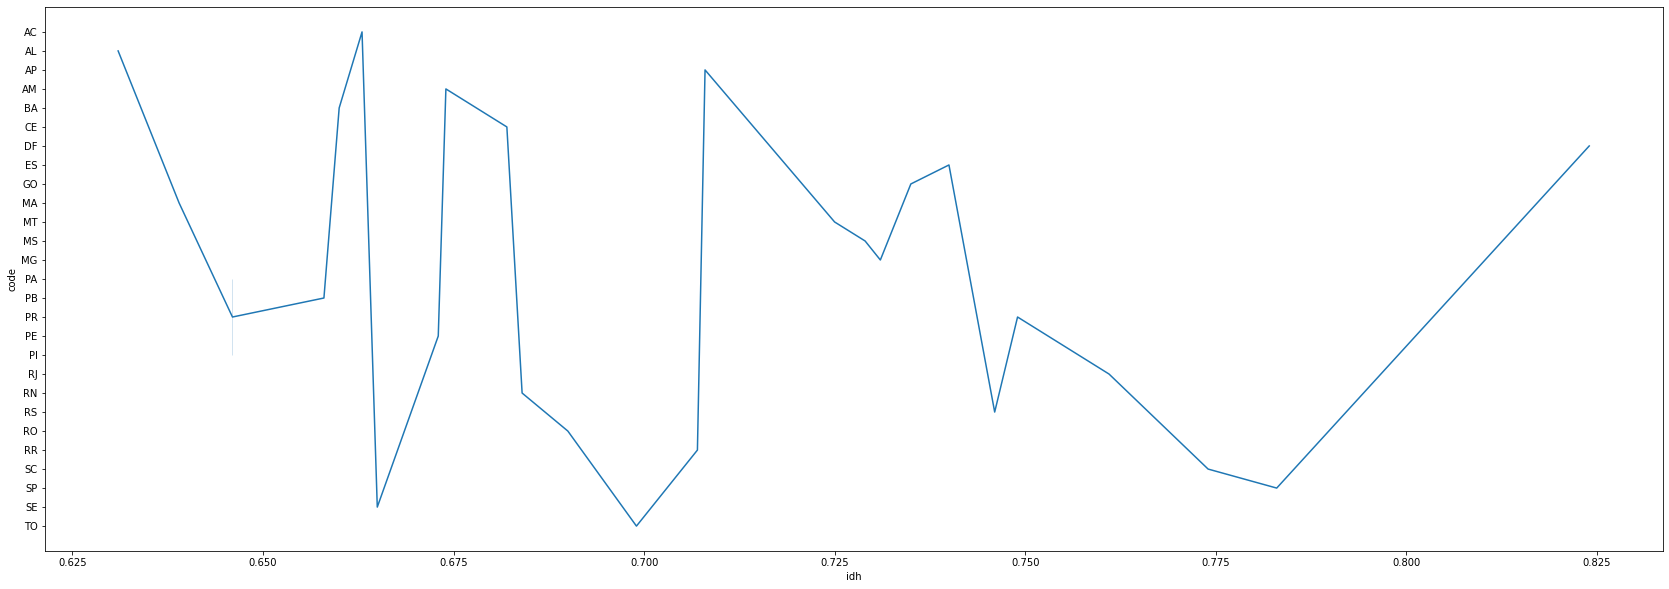

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(29, 10))
sns.lineplot('idh', 'code', data=states_df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


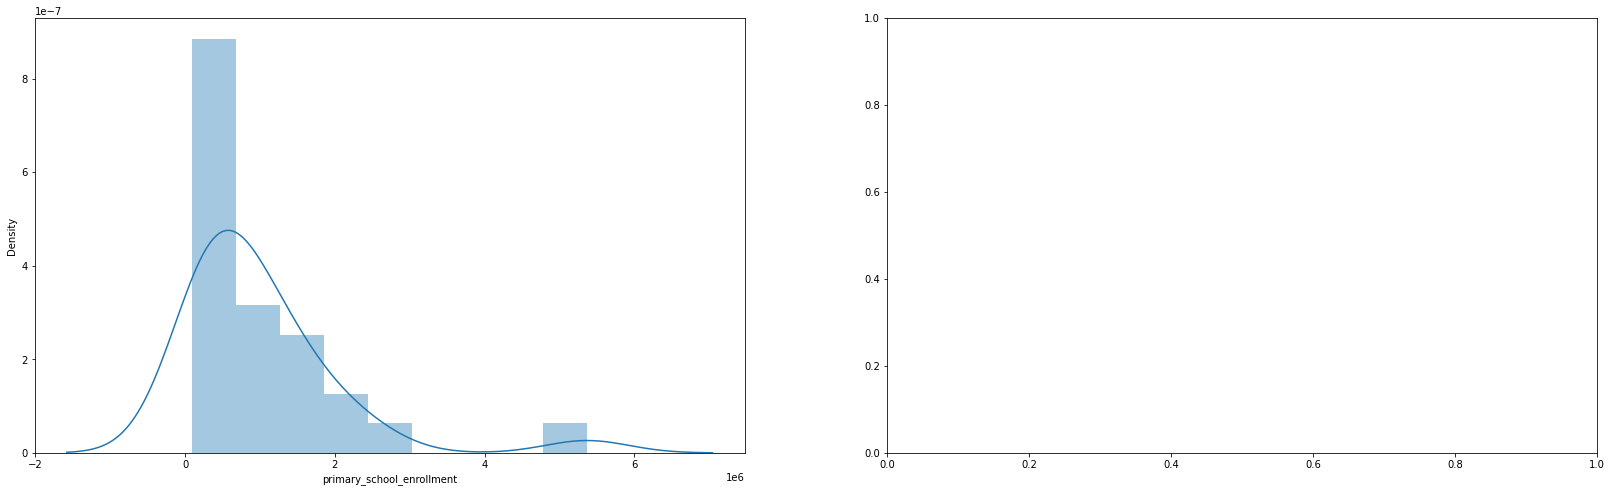

In [ ]:
#Gere o gráfico de estimativa de densidade do kernel
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(28, 8))

sns.distplot(states_df['primary_school_enrollment'].dropna(), ax=axes[0])

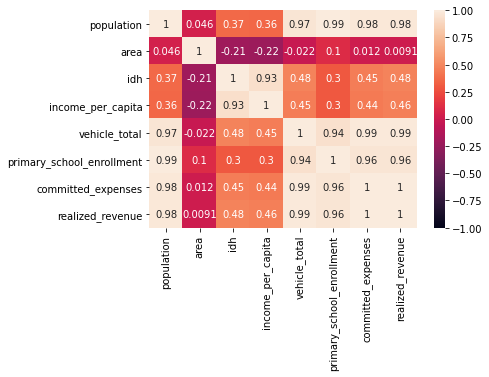

In [ ]:
sns.heatmap(states_df.corr(), annot=True, vmin=-1, vmax=1)
# - Os argumentos vmin e vmax indicam que os valores
#    mínimo e máximo da correlação são -1 e 1
# - O parâmetro annot faz com que a correlação seja escrita
#   dentro dos retângulos

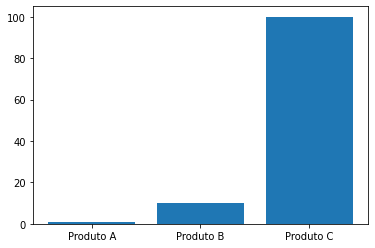

In [ ]:
grupos = ['Produto A', 'Produto B', 'Produto C']
valores = [1, 10, 100]
plt.bar(grupos, valores)
plt.show()

## 📃 Export

In [ ]:
from google.colab import drive
#drive.mount('/content/drive')

states_df.to_csv('/content/drive/MyDrive/aaaa/ibge_states.csv')

# FOLIUM



In [ ]:
pip install folium

In [ ]:
import folium

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv')
df.head()

,name,pop,lat,lon
0,New York,8287238,40.730599,-73.986581
1,Los Angeles,3826423,34.053717,-118.242727
2,Chicago,2705627,41.875555,-87.624421
3,Houston,2129784,29.758938,-95.367697
4,Philadelphia,1539313,39.952335,-75.163789


In [ ]:
trace = go.Scattergeo(
                     locationmode = 'USA-states',
                     lon = df['lon'],
                     lat = df['lat'],
                     text = df['name'] + '- População: ' + df['pop'].astype(str),
                     marker = dict(
                            size = df['pop']/5000,
                            color = '#e74c3c',
                            line = {'width': 0.5, 
                                    'color': '#2c3e50'},
                            sizemode = 'area')
                    )
data = [trace]
layout = go.Layout(
        title = '<b>População americana em 2014</b>',
        titlefont = {'family': 'Arial',
                     'size': 24},
        geo =  {'scope': 'usa',
                'projection': {'type': 'albers usa'},
                'showland': True,
                'landcolor': '#2ecc71',
                'showlakes': True,
                'lakecolor': '#3498db',
                'subunitwidth': 1,
                'subunitcolor': "rgb(255, 255, 255)"
                })
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# GEOPANDAS


In [ ]:
pip install geopandas

In [ ]:
pip install pygeos

In [ ]:
import geopandas

In [ ]:
#https://geopandas.org/gallery/create_geopandas_from_pandas.html
gdf = geopandas.GeoDataFrame(
    states_df, geometry=geopandas.points_from_xy(states_df.lon, states_df.lat))

In [ ]:
print(gdf.head())

  code  ...                     geometry
0   AC  ...   POINT (-70.55000 -8.77000)
1   AL  ...   POINT (-35.73000 -9.71000)
2   AP  ...   POINT (-61.66000 -3.07000)
3   AM  ...    POINT (-51.77000 1.41000)
4   BA  ...  POINT (-38.51000 -12.96000)

[5 rows x 13 columns]


In [ ]:
states_df.head()

,code,governor,population,area,idh,income_per_capita,vehicle_total,primary_school_enrollment,committed_expenses,realized_revenue,lat,lon,geometry
0,AC,GLADSON DE LIMA CAMELI,894470,164173.431,0.663,917,277831,157646,6.084417e+06,6.632883e+06,-8.77,-70.55,POINT (-70.55000 -8.77000)
1,AL,JOSE RENAN VASCONCELOS CALHEIROS FILHO,3351543,27830.656,0.631,796,834827,490587,1.046063e+07,1.195044e+07,-9.71,-35.73,POINT (-35.73000 -9.71000)
2,AP,ANTONIO WALDEZ GÓES DA SILVA,861773,142470.762,0.708,893,195039,136185,4.224464e+06,5.396417e+06,-3.07,-61.66,POINT (-61.66000 -3.07000)
3,AM,WILSON MIRANDA LIMA,4207714,1559167.878,0.674,852,883083,705007,1.532490e+07,1.732846e+07,1.41,-51.77,POINT (-51.77000 1.41000)
4,BA,RUI COSTA DOS SANTOS,14930634,564760.427,0.660,965,4139107,2034711,4.557016e+07,5.019100e+07,-12.96,-38.51,POINT (-38.51000 -12.96000)


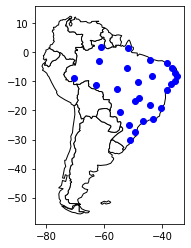

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='blue')

plt.show()

In [ ]:
#https://geopandas.org/gallery/plotting_with_folium.html
geometry = geopandas.points_from_xy(states_df.lon, states_df.lat)
states_df = geopandas.GeoDataFrame(states_df[['code', 'governor', 'population', 'area', 'idh', 'income_per_capita', 'vehicle_total', 'primary_school_enrollment', 'committed_expenses', 'realized_revenue']], geometry=geometry)

states_df.head()

,code,governor,population,area,idh,income_per_capita,vehicle_total,primary_school_enrollment,committed_expenses,realized_revenue,geometry
0,AC,GLADSON DE LIMA CAMELI,894470,164173.431,0.663,917,277831,157646,6.084417e+06,6.632883e+06,POINT (-70.55000 -8.77000)
1,AL,JOSE RENAN VASCONCELOS CALHEIROS FILHO,3351543,27830.656,0.631,796,834827,490587,1.046063e+07,1.195044e+07,POINT (-35.73000 -9.71000)
2,AP,ANTONIO WALDEZ GÓES DA SILVA,861773,142470.762,0.708,893,195039,136185,4.224464e+06,5.396417e+06,POINT (-61.66000 -3.07000)
3,AM,WILSON MIRANDA LIMA,4207714,1559167.878,0.674,852,883083,705007,1.532490e+07,1.732846e+07,POINT (-51.77000 1.41000)
4,BA,RUI COSTA DOS SANTOS,14930634,564760.427,0.660,965,4139107,2034711,4.557016e+07,5.019100e+07,POINT (-38.51000 -12.96000)


In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
states_df.code.unique()

array(['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT',
       'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO',
       'RR', 'SC', 'SP', 'SE', 'TO'], dtype=object)

Text(0.5, 1.0, 'Estados brasileiros')

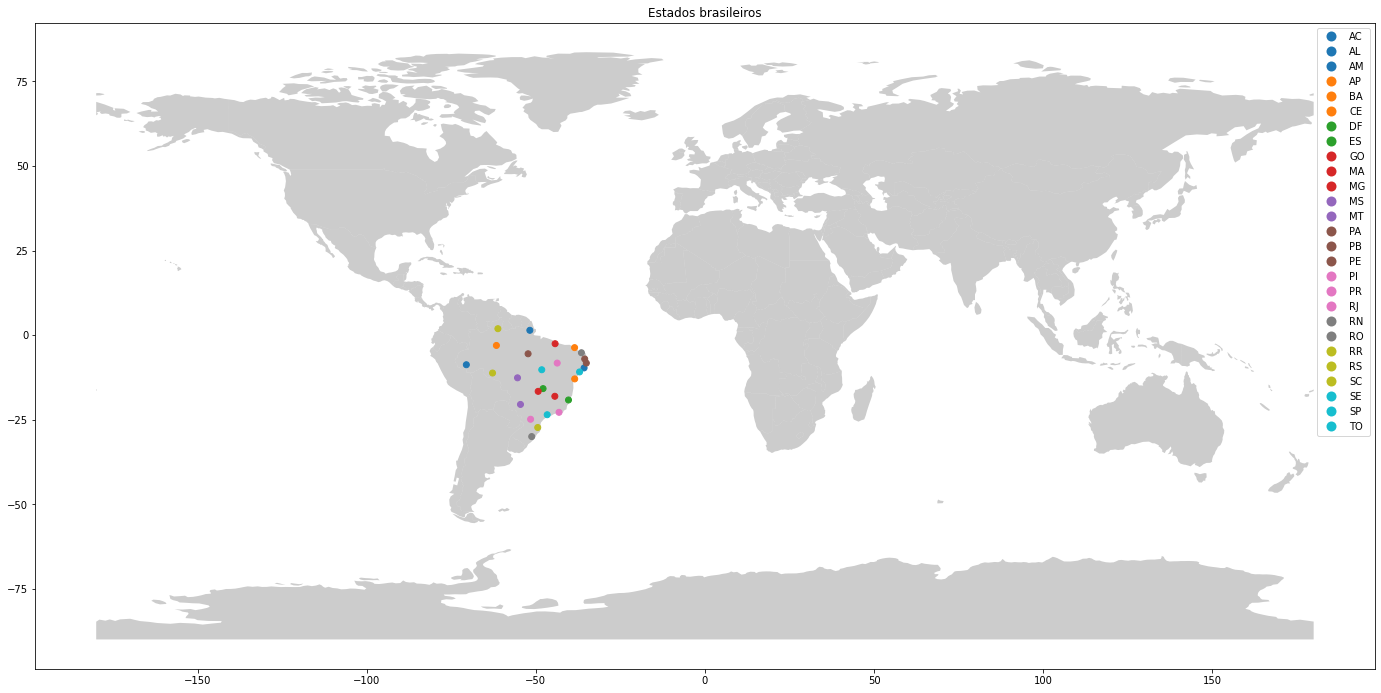

In [ ]:
fig, ax = plt.subplots(figsize=(24,18))
world.plot(ax=ax, alpha=0.4, color='grey')
states_df.plot(column='code', ax=ax, legend=True)
plt.title('Estados brasileiros')

In [ ]:
# Stamen Terrain

map

In [ ]:
pip install geoplot

     |████████████████████████████████| 14.4MB 315kB/s 
     |████████████████████████████████| 19.1MB 245kB/s 
     |████████████████████████████████| 225kB 43.4MB/s 
  Created wheel for cartopy: filename=Cartopy-0.18.0-cp37-cp37m-linux_x86_64.whl size=15127698 sha256=0d296909de8f75aca113425bc8c4939ab586d44e4b9fbea95e0f4442c1da4f5d
  Stored in directory: /root/.cache/pip/wheels/8d/f8/da/2c05136f2162370d2baec85bfbbf91d7729ab9e248da878acd
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=679eb47bec2395529d0cedf0d18aca54f9941460cf00f5ebf4f1745d1e439d5e
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built cartopy pyshp


In [ ]:
import geopandas
import geoplot

world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
boroughs = geopandas.read_file(
    geoplot.datasets.get_path('nyc_boroughs')
)
collisions = geopandas.read_file(
    geoplot.datasets.get_path('nyc_injurious_collisions'))

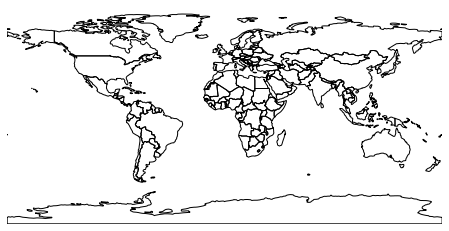

In [ ]:
geoplot.polyplot(world, figsize=(8, 4))

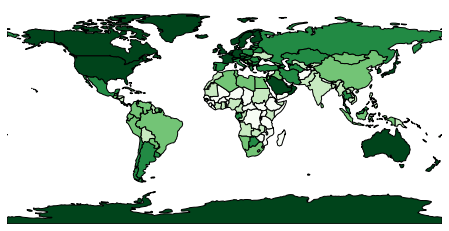

In [ ]:
import mapclassify
gpd_per_person = world['gdp_md_est'] / world['pop_est']
scheme = mapclassify.Quantiles(gpd_per_person, k=5)

# Note: this code sample requires geoplot>=0.4.0.
geoplot.choropleth(
    world, hue=gpd_per_person, scheme=scheme,
    cmap='Greens', figsize=(8, 4)
)